In [25]:
import pandas as pd
def get_df():
    df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set - Copy.xlsx")
    df = df.drop(df.index[:12])
    df = df.drop(df.index[-1:])
    return df

Koeficienty korelace

In [23]:
df = get_df()
#>> normalni dataset koeficienty
parametry = ["aktivni-1", "nove-1","zbytek-1"]
for parametr in parametry:
    corr_coef = df['aktivni'].corr(df[parametr])
    print(f"korelační koeficient aktivni a {parametr}: {corr_coef}")

#>> detrendovany dataset koeficienty
print("\ndetrendovaná data")
for parametr in parametry:
    corr_coef = df_detrend['aktivni'].corr(df_detrend[parametr])
    print(f"korelační koeficient aktivni a {parametr} : {corr_coef}")

     datum  Unnamed: 1  repo-1  repo-2  repo-3  repo-4  repo-5  repo-6  \
12  201602           5       5       5       5       5       5       5   
13  201603           5       5       5       5       5       5       5   
14  201604           5       5       5       5       5       5       5   
15  201605           5       5       5       5       5       5       5   
16  201606           5       5       5       5       5       5       5   
..     ...         ...     ...     ...     ...     ...     ...     ...   
93  202211         700     700     700     700     700     700     575   
94  202212         700     700     700     700     700     700     575   
95  202301         700     700     700     700     700     700     575   
96  202302         700     700     700     700     700     700     575   
97  202303         700     700     700     700     700     700     575   

    repo-7  repo-8  ...  doba-4  doba-5  doba-6  doba-7  doba-8  doba-9  \
12       5       5  ...    69.0    7

Grafy, detrendování pandas

     datum  Unnamed: 1  repo-1  repo-2  repo-3  repo-4  repo-5  repo-6  \
12  201602           5       5       5       5       5       5       5   
13  201603           5       5       5       5       5       5       5   
14  201604           5       5       5       5       5       5       5   
15  201605           5       5       5       5       5       5       5   
16  201606           5       5       5       5       5       5       5   
..     ...         ...     ...     ...     ...     ...     ...     ...   
93  202211         700     700     700     700     700     700     575   
94  202212         700     700     700     700     700     700     575   
95  202301         700     700     700     700     700     700     575   
96  202302         700     700     700     700     700     700     575   
97  202303         700     700     700     700     700     700     575   

    repo-7  repo-8  ...  doba-4  doba-5  doba-6  doba-7  doba-8  doba-9  \
12       5       5  ...    69.0    7

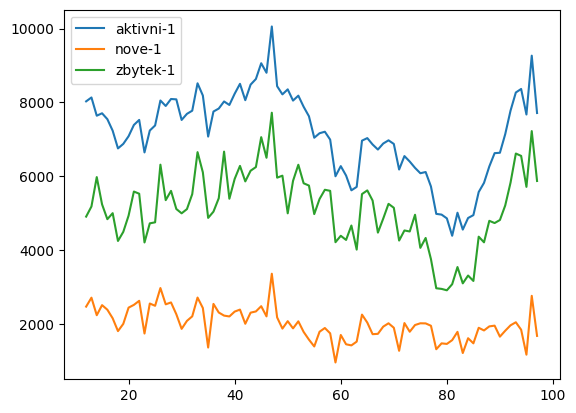

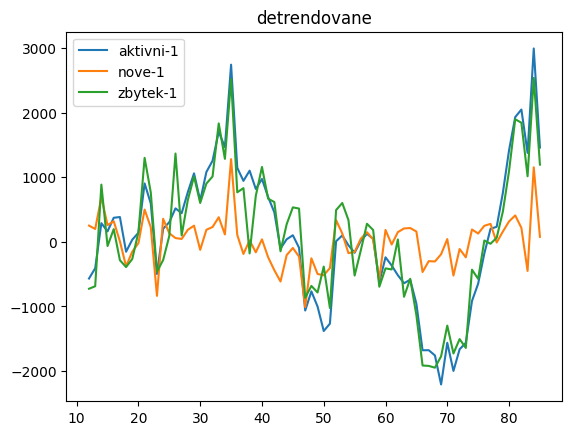

In [24]:
from matplotlib import pyplot as plt
import scipy
df = get_df()
#>> normalni data
plt.plot(df.index, df['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df['nove-1'], label='nove-1')
plt.plot(df.index, df['zbytek-1'], label='zbytek-1')
plt.legend()
plt.show()
#>> detrendovane data
df_detrend = df
df_detrend["aktivni-1"] = pd.Series(scipy.signal.detrend(df['aktivni-1']))
df_detrend["nove-1"] = pd.Series(scipy.signal.detrend(df['nove-1']))
df_detrend["zbytek-1"] = pd.Series(scipy.signal.detrend(df['zbytek-1']))
plt.title('detrendovane')
plt.plot(df.index, df_detrend['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df_detrend['nove-1'], label='nove-1')
plt.plot(df.index, df_detrend['zbytek-1'], label='zbytek-1')
plt.legend()
plt.show()


Detrendování pandas

In [30]:
import pandas as pd
df = get_df()
parametry = ['aktivni-1', 'nove-1', ]
for parametr in parametry:
    df_detrend[parametr] = pd.Series((df[parametr]))

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

desesonializovani dat

detrendování polinominální regresí 

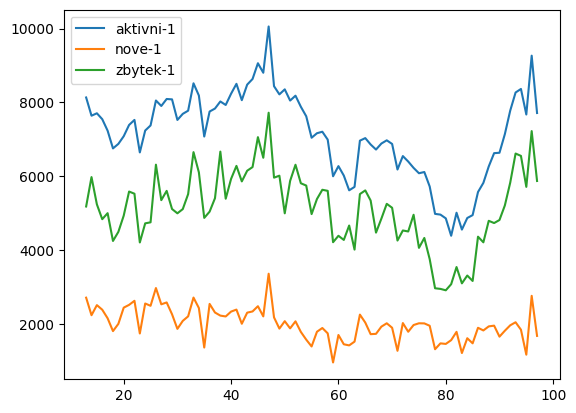

KeyError: 'aktivni-1'

In [16]:
# Import libraries
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
df = get_df()
# Define X and y
X = df[["aktivni-1", "nove-1","zbytek-1"]]
y = df[['aktivni']]
# Define the degree of the polynomial
degree = 3
# Fit a polynomial regression to the data
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
# Predict the trend line
trend = model.predict(X_poly)
# Subtract the trend from the original data
df_detrend_polyregression = y - trend

plt.plot(df.index, df['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df['nove-1'], label='nove-1')
plt.plot(df.index, df['zbytek-1'], label='zbytek-1')
plt.legend()
plt.show()

plt.plot(df.index, df_detrend_polyregression['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df_detrend_polyregression['nove-1'], label='nove-1')
plt.plot(df.index, df_detrend_polyregression['zbytek-1'], label='zbytek-1')
plt.legend()
plt.show()